## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75, 0.65, 0.5, 0.4]

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "MOMENTUM-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0809 17:13:06.165021 21148 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0809 17:13:06.166516 21148 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0809 17:13:06.205198 21148 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 17:13:06.206188 21148 deprecation_wrapper.py:119] From C:\Users\an_fl\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 17:13:06.209663 21148 

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8901 - acc: 0.3256 - val_loss: 1.7231 - val_acc: 0.3844
Epoch 2/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6825 - acc: 0.4052 - val_loss: 1.6114 - val_acc: 0.4330
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5891 - acc: 0.4401 - val_loss: 1.7403 - val_acc: 0.3635
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5286 - acc: 0.4601 - val_loss: 1.5713 - val_acc: 0.4376
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.4821 - acc: 0.4766 - val_loss: 1.5381 - val_acc: 0.4447
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.4400 - acc: 0.4930 - val_loss: 1.4999 - val_acc: 0.4681
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.4058 - acc: 0.5034 - val_loss: 1.4807 - 

Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7371 - acc: 0.3832 - val_loss: 1.7814 - val_acc: 0.3521
Epoch 3/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6547 - acc: 0.4138 - val_loss: 1.6712 - val_acc: 0.4094
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5944 - acc: 0.4358 - val_loss: 1.7225 - val_acc: 0.3793
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5528 - acc: 0.4502 - val_loss: 1.5634 - val_acc: 0.4489
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5115 - acc: 0.4650 - val_loss: 1.5798 - val_acc: 0.4375
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4793 - acc: 0.4765 - val_loss: 1.5445 - val_acc: 0.4489
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4461 - acc: 0.4891 - val_loss: 1.5646 - val_acc: 0.4487
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 141us/step - loss: 1.6971 - acc: 0.3998 - val_loss: 1.7033 - val_acc: 0.3826
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6413 - acc: 0.4202 - val_loss: 1.6691 - val_acc: 0.4130
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6025 - acc: 0.4353 - val_loss: 1.8270 - val_acc: 0.3623
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5616 - acc: 0.4480 - val_loss: 1.5954 - val_acc: 0.4372
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5377 - acc: 0.4552 - val_loss: 1.6833 - val_acc: 0.4069
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5032 - acc: 0.4672 - val_loss: 1.5985 - val_acc: 0.4252
Epoch 9/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4824 - acc: 0.4764 - val_loss: 1.5835 - val_acc: 0.4340
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 141us/step - loss: 1.6822 - acc: 0.4084 - val_loss: 1.7141 - val_acc: 0.3988
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6493 - acc: 0.4185 - val_loss: 1.6859 - val_acc: 0.4074
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6149 - acc: 0.4320 - val_loss: 1.5971 - val_acc: 0.4326
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5839 - acc: 0.4437 - val_loss: 1.7253 - val_acc: 0.3888
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5604 - acc: 0.4499 - val_loss: 1.6293 - val_acc: 0.4129
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5372 - acc: 0.4598 - val_loss: 1.5555 - val_acc: 0.4463
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5132 - acc: 0.4693 - val_loss: 1.6541 - val_acc: 0.4062
Epoch 11/50
50000/50000 [===================

Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6835 - acc: 0.4091 - val_loss: 1.6597 - val_acc: 0.4122
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6449 - acc: 0.4178 - val_loss: 1.7507 - val_acc: 0.3925
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6170 - acc: 0.4310 - val_loss: 1.6546 - val_acc: 0.4060
Epoch 8/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5918 - acc: 0.4418 - val_loss: 1.5843 - val_acc: 0.4498
Epoch 9/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5678 - acc: 0.4483 - val_loss: 1.6790 - val_acc: 0.3977
Epoch 10/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5440 - acc: 0.4560 - val_loss: 1.6051 - val_acc: 0.4372
Epoch 11/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5237 - acc: 0.4625 - val_loss: 1.6971 - val_acc: 0.3907
Epoch 12/50
50000/50000 [=======

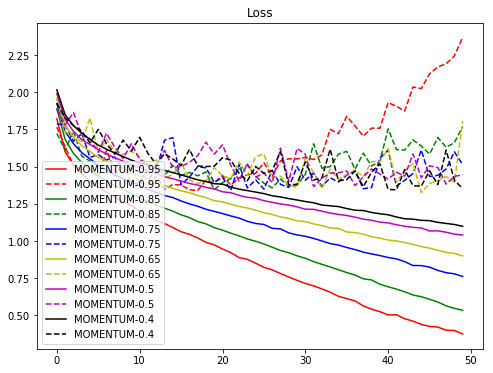

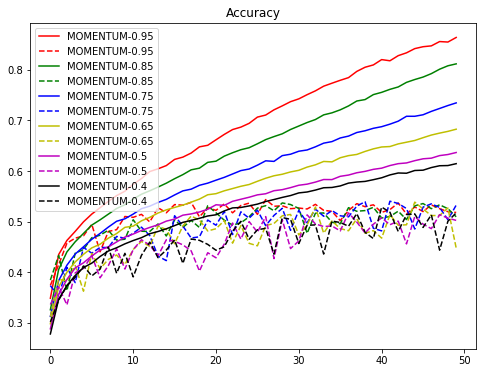

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()